In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

In [ ]:
df=pd.read_csv('Statewide_Solar_Projects__Beginning_2000.csv')

FileNotFoundError: ignored

In [ ]:
df

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,06/30/2023,SDG-59017,06/30/2023,Con Ed,STATEN ISLAND,Richmond,10308.0,CENY-SI,Wainwright,3R35,Kamtech Solar Solutions,NM,9.89,8.45,"11,605",NaN,1
1,06/30/2023,SDG-59015,06/30/2023,Con Ed,STATEN ISLAND,Richmond,10312.0,CENY-SI,Woodrow,5R15,Kamtech Solar Solutions,NM,15.28,13.06,"17,937",NaN,1
2,06/30/2023,SDG-59012,06/30/2023,Con Ed,STATEN ISLAND,Richmond,10314.0,CENY-SI,Willowbrook,4R86,Kamtech Solar Solutions,NM,7.18,6.14,"8,433",NaN,1
3,06/30/2023,SDG-59009,06/30/2023,Con Ed,East Elmhurst,Queens,11369.0,CENY-Q,Corona_1,1208,Kamtech Solar Solutions,NM,5.62,4.8,"6,592",NaN,1
4,06/30/2023,SDG-59003,06/30/2023,Con Ed,STATEN ISLAND,Richmond,10310.0,CENY-SI,FRESH_KILLS,395,Kamtech Solar Solutions,NM,9.89,8.45,"11,605",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203976,06/30/2023,49.0,12/19/2002,RGE,Ontario,Wayne,14519.0,Sodus,0205LS0237-1589 RTE 104,0205LS0237,NaN,NM,2.81,2.4,"3,296",NaN,1
203977,06/30/2023,48.0,09/24/2002,RGE,Friendship,Allegany,14739.0,Fillmore,8333GV7702-Friendship Nile RD,8333GV7702,NaN,NM,2.93,2.5,"3,433",NaN,1
203978,06/30/2023,NaN,07/01/2018,PSEGLI,NaN,Suffolk,11786.0,NaN,NaN,NaN,NaN,FIT,"34,362","24,900","40,335,490",NaN,1
203979,06/30/2023,NaN,03/03/2018,PSEGLI,NaN,Suffolk,11933.0,NaN,NaN,NaN,NaN,FIT,"27,600","20,000","32,397,984",NaN,1


In [ ]:
# Remove commas from target variable and convert to Integer type
df['Estimated Annual PV Energy Production (kWh)']=df['Estimated Annual PV Energy Production (kWh)'].str.replace(',', '')
df['Estimated Annual PV Energy Production (kWh)']=df['Estimated Annual PV Energy Production (kWh)'].astype(str).astype(int)

# **Initial EDA**

In [ ]:
# Group the data by county
grouped_df = df.groupby('County')

# Calculate the average energy production for each county
average_energy_production = grouped_df['Estimated Annual PV Energy Production (kWh)'].mean()

new_df = pd.DataFrame({'County': average_energy_production.index, 'Average Annual PV Energy Production (kWh)': average_energy_production.values})
# Print the new DataFrame
print(new_df)

         County  Average Annual PV Energy Production (kWh)
0        Albany                               25020.409014
1      Allegany                              485939.675159
2         Bronx                               14520.704412
3        Broome                               61063.725047
4   Cattaraugus                              198128.631922
..          ...                                        ...
57   Washington                               50796.077519
58        Wayne                              111759.747515
59  Westchester                               18487.832530
60      Wyoming                              180568.445652
61        Yates                              140565.769663

[62 rows x 2 columns]


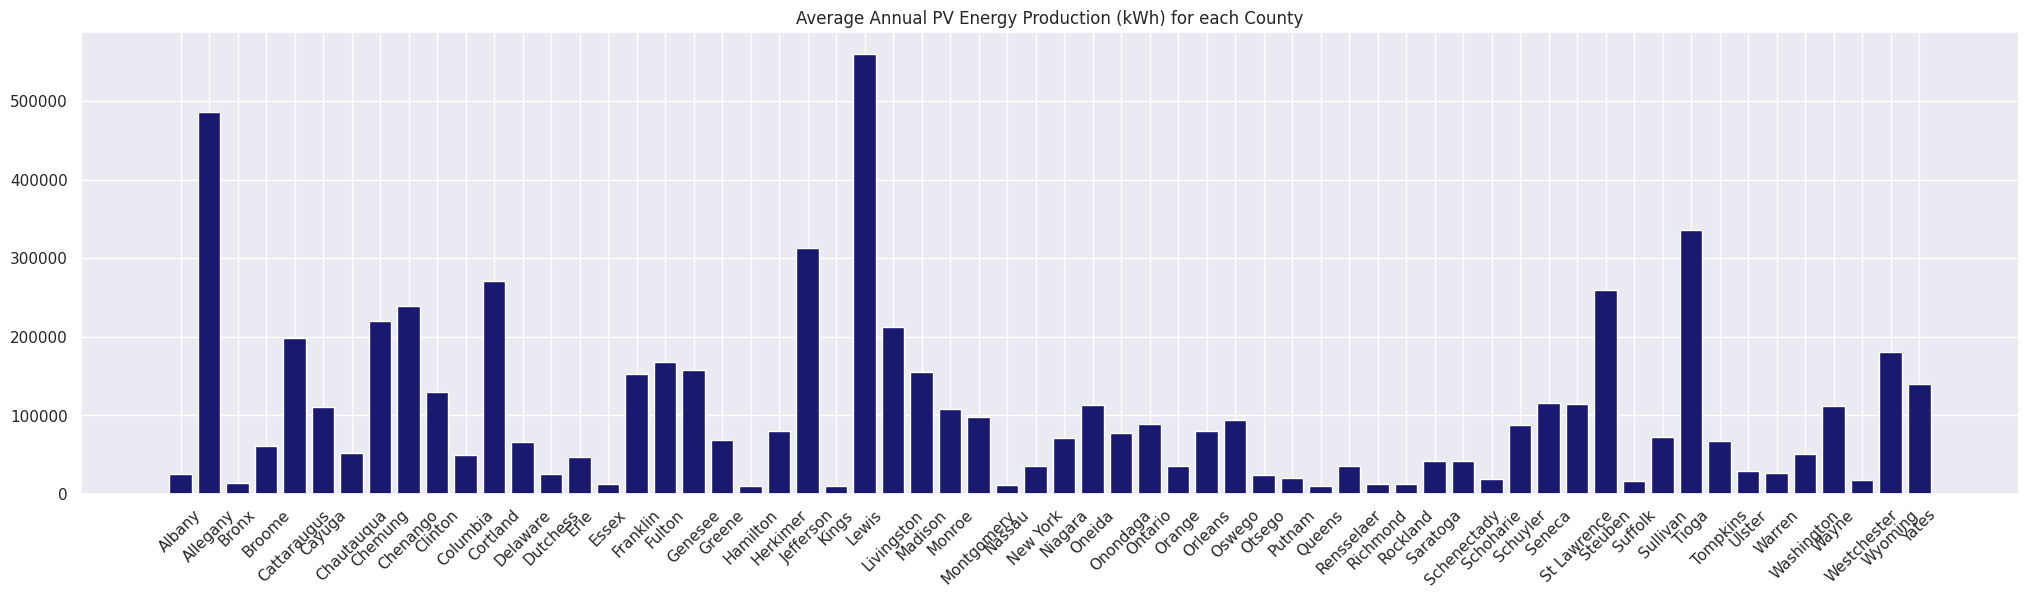

In [ ]:
plt.figure(figsize=(25,6))

plt.bar(x=new_df['County'],

        height=new_df['Average Annual PV Energy Production (kWh)'],

        color='midnightblue')

plt.xticks(rotation=45)

plt.title('Average Annual PV Energy Production (kWh) for each County')

plt.savefig('Average Annual PV Energy Production (kWh) for each County.png')

In [ ]:
# Find the county with the maximum average annual PV Energy Production (kWh)
county_with_max_average_pv_energy_production = average_energy_production.idxmax()

# Get the value of the maximum average annual PV Energy Production (kWh)
max_average_pv_energy_production = average_energy_production[county_with_max_average_pv_energy_production]

print(county_with_max_average_pv_energy_production, max_average_pv_energy_production)

Lewis 559534.4042553192


In [ ]:
# Find the county with the minimum average annual PV Energy Production (kWh)
county_with_min_average_pv_energy_production = average_energy_production.idxmin()

# Get the value of the minimum average annual PV Energy Production (kWh)
min_average_pv_energy_production = average_energy_production[county_with_min_average_pv_energy_production]

print(county_with_min_average_pv_energy_production, min_average_pv_energy_production)

Queens 9766.696714608688


**The county with maximum average Energy production is : Lewis 559534.4042553192**

**The county with minmum average Energy production is : Queens 9766.696714608688**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
# Read the data from the image
df = pd.read_csv('Solar_Data_Final.csv')

In [ ]:
df

,ZIP,Mean_Income,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects,Total PV Module Quantity,Project Cost,Total NYSERDA Incentive,Expected KWh Annual Production,Latitude,Longitude
0,10001,170154,112.49,95.20,132044,4,88.0,156541.00,40286.0,36123.0,40.752217,-74.002998
1,10001,170154,112.49,95.20,132044,4,99.0,170101.06,12118.0,28048.0,40.746232,-73.994315
2,10002,76115,877.56,739.00,1030117,14,39.0,64672.00,14100.0,13147.0,40.719745,-73.991352
3,10002,76115,877.56,739.00,1030117,14,62.0,0.00,0.0,0.0,40.714234,-73.992397
4,10002,76115,877.56,739.00,1030117,14,13.0,17973.00,3738.0,4106.0,40.712357,-73.994933
...,...,...,...,...,...,...,...,...,...,...,...,...
130947,14905,90476,113.90,97.33,133673,12,28.0,33900.00,3584.0,10122.0,42.086405,-76.825180
130948,14905,90476,113.90,97.33,133673,12,19.0,20835.00,4028.0,5547.0,42.086405,-76.825180
130949,14905,90476,113.90,97.33,133673,12,18.0,14687.00,2250.0,4842.0,42.097788,-76.845264
130950,14905,90476,113.90,97.33,133673,12,22.0,19751.00,2915.0,5912.0,42.097788,-76.845264


In [ ]:
# Split the data into training and testing sets with 67% training and 33% testing data
X_train, X_test, y_train, y_test = train_test_split(df[['ZIP', 'Mean_Income', 'Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 'Number of Projects', 'Total PV Module Quantity', 'Project Cost', 'Total NYSERDA Incentive']], df['Estimated Annual PV Energy Production (kWh)'], test_size=0.33)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (38083, 8) (38083,)
Testing set shape: (18758, 8) (18758,)


In [ ]:
# Create and train 4 machine learning models
models = {}
models['LinearRegression'] = LinearRegression()
models['DecisionTreeRegressor'] = DecisionTreeRegressor()
models['RandomForestRegressor'] = RandomForestRegressor()
models['KNeighborsRegressor'] = KNeighborsRegressor()

In [ ]:
for model_name, model in models.items():
    model.fit(X_train, y_train)

In [ ]:
# Evaluate the models on the testing set
for model_name, model in models.items():
    score = model.score(X_test, y_test)
    print('Model:', model_name, 'Score:', score)

Model: LinearRegression Score: 0.9999999998019538
Model: DecisionTreeRegressor Score: 0.9999999997438722
Model: RandomForestRegressor Score: 0.9999999996582635
Model: KNeighborsRegressor Score: 0.9845303394934821


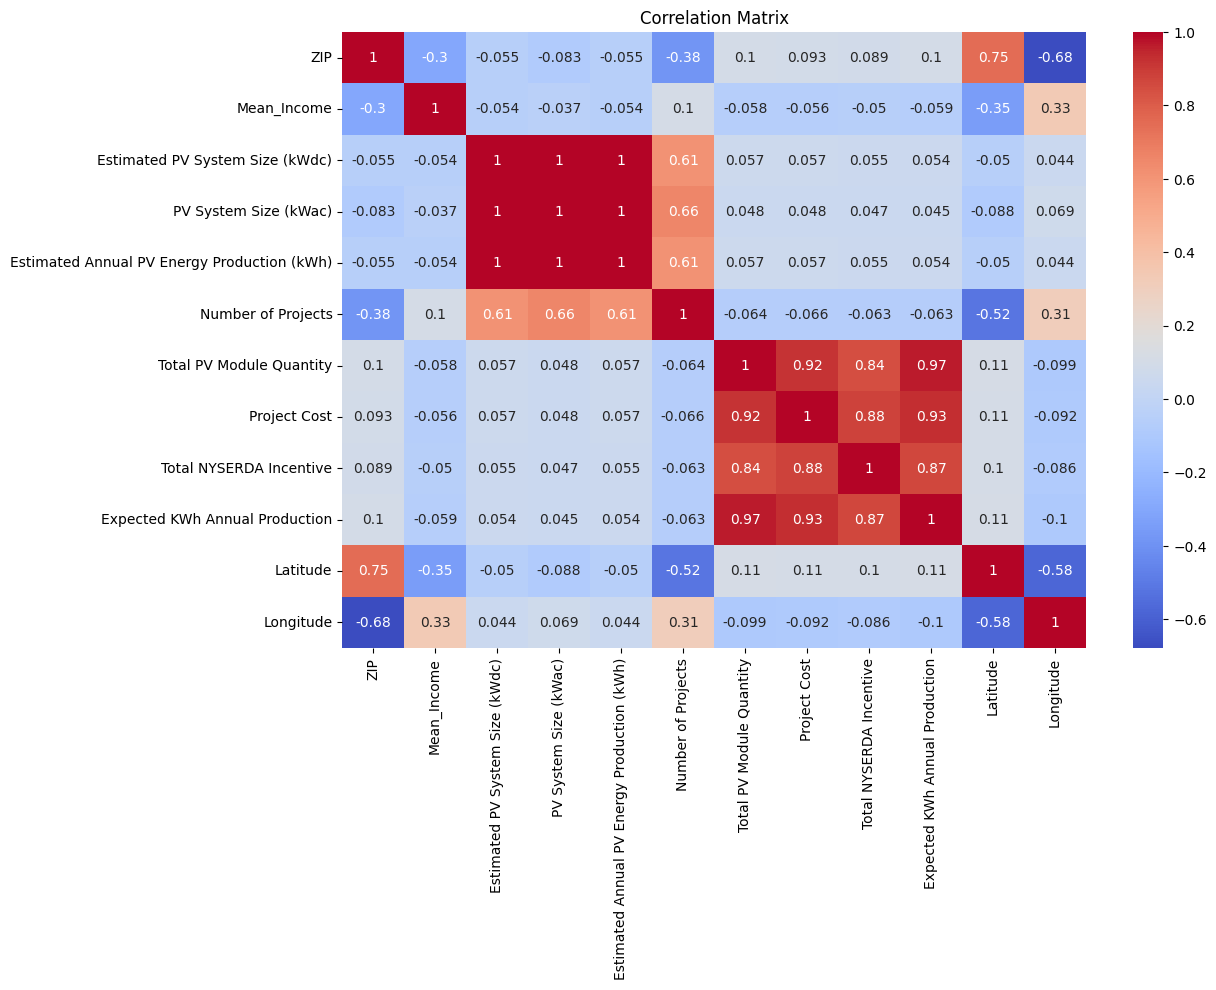

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('Solar_Data_Final.csv')

# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#v1
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Load your data
# Load your data
df = pd.read_csv('Solar_Data_Final.csv')

# Drop the 'Expected KWh Annual Production' column from the DataFrame
df = df.drop(columns=['Expected KWh Annual Production'])

# Now, when you check the description of the DataFrame, 'Expected KWh Annual Production' should not appear.
print(df.describe())

print(df.head())

# Split the data
#X = df[['ZIP', 'Mean_Income', 'Estimated PV System Size (kWdc)', 'PV System Size (kWac)',
#        'Number of Projects', 'Total PV Module Quantity', 'Project Cost',
#        'Total NYSERDA Incentive']]

# Make sure that 'Expected KWh Annual Production' is not in the feature set
if 'Expected KWh Annual Production' in df.columns:
    print("'Expected KWh Annual Production' is present in the DataFrame.")
else:
    print("'Expected KWh Annual Production' is not present in the DataFrame.")

# Assuming it's not meant to be part of your features, continue with your analysis
X = df[['ZIP', 'Mean_Income', 'PV System Size (kWac)',
        'Number of Projects', 'Total PV Module Quantity', 'Project Cost',
        'Total NYSERDA Incentive']]
y = df['Estimated Annual PV Energy Production (kWh)']

# Your train-test split and model training would follow here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Define your models
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model_name}')
    print(f'MSE: {mse}, MAE: {mae}, R-squared: {r2}')

    # Cross-validation
    scores = cross_val_score(model, X, y, cv=5)
    print(f'Cross-Validation Scores: {scores}')
    print(f'Average Score: {scores.mean()}')
    print('---')


                 ZIP    Mean_Income  Estimated PV System Size (kWdc)  \
count  130952.000000  130952.000000                    130952.000000   
mean    11826.923636  119586.949165                      8209.966435   
std      1111.282534   42565.830420                      8263.838698   
min     10001.000000   30794.000000                         2.010000   
25%     10994.000000   91504.000000                      2290.540000   
50%     11717.000000  112335.000000                      5616.390000   
75%     12446.000000  137972.000000                     11455.510000   
max     14905.000000  462998.000000                     44531.950000   

       PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
count          130952.000000                                 1.309520e+05   
mean             6628.957574                                 9.637060e+06   
std              6418.644251                                 9.700349e+06   
min                 1.720000               

In [ ]:
#v2
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

# Load your data
df = pd.read_csv('Solar_Data_Final.csv')

# Drop the 'Expected KWh Annual Production' column from the DataFrame
df = df.drop(columns=['Expected KWh Annual Production'])

# Check for any anomalies or potential data leakage
print(df.describe())

# Split the data
X = df[['ZIP', 'Mean_Income', 'PV System Size (kWac)',
        'Number of Projects', 'Total PV Module Quantity', 'Project Cost',
        'Total NYSERDA Incentive']]
y = df['Estimated Annual PV Energy Production (kWh)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define your models
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=5), # Limit the depth of the tree
    'RandomForestRegressor': RandomForestRegressor(max_depth=5), # Limit the depth of the forest
    'KNeighborsRegressor': make_pipeline(StandardScaler(), KNeighborsRegressor()) # Include scaling in the pipeline
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train) # Make sure to use scaled data for training
    y_pred = model.predict(X_test_scaled) # Use scaled data for prediction
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model_name}')
    print(f'MSE: {mse}, MAE: {mae}, R-squared: {r2}')

    # Cross-validation
    scores = cross_val_score(model, scaler.transform(X), y, cv=5) # Use scaled data for cross-validation
    print(f'Cross-Validation Scores: {scores}')
    print(f'Average Score: {scores.mean()}')
    print('---')


                 ZIP    Mean_Income  Estimated PV System Size (kWdc)  \
count  130952.000000  130952.000000                    130952.000000   
mean    11826.923636  119586.949165                      8209.966435   
std      1111.282534   42565.830420                      8263.838698   
min     10001.000000   30794.000000                         2.010000   
25%     10994.000000   91504.000000                      2290.540000   
50%     11717.000000  112335.000000                      5616.390000   
75%     12446.000000  137972.000000                     11455.510000   
max     14905.000000  462998.000000                     44531.950000   

       PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
count          130952.000000                                 1.309520e+05   
mean             6628.957574                                 9.637060e+06   
std              6418.644251                                 9.700349e+06   
min                 1.720000               

In [ ]:
#V3
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

# Load your data
df = pd.read_csv('Solar_Data_Final.csv')

# Check if 'Expected KWh Annual Production' is in the DataFrame and drop it if present
if 'Expected KWh Annual Production' in df.columns:
    df.drop('Expected KWh Annual Production', axis=1, inplace=True)

# Descriptive statistics and the first few rows of the DataFrame
print(df.describe())
print(df.head())

# Define the features and the target variable
X = df[['ZIP', 'Mean_Income', 'PV System Size (kWac)',
        'Number of Projects', 'Total PV Module Quantity', 'Project Cost',
        'Total NYSERDA Incentive']]
y = df['Estimated Annual PV Energy Production (kWh)']

# Split the data into training and testing sets with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the models with pipelines to include scaling
models = {
    'LinearRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('linear', LinearRegression())
    ]),
    'DecisionTreeRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('decision_tree', DecisionTreeRegressor(max_depth=5))
    ]),
    'RandomForestRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('random_forest', RandomForestRegressor(max_depth=5))
    ]),
    'KNeighborsRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor())
    ])
}

# Dictionary to store the results
model_results = {}

# Train and evaluate models
for model_name, model in models.items():
    # Fit the model on the training set
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    # Store the results
    model_results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'CV Scores': cv_scores,
        'CV Average': cv_scores.mean()
    }

# Print the results
for model_name, results in model_results.items():
    print(f"Results for {model_name}:")
    print(f"MSE: {results['MSE']}")
    print(f"MAE: {results['MAE']}")
    print(f"R2: {results['R2']}")
    print(f"Cross-Validation Scores: {results['CV Scores']}")
    print(f"Average CV Score: {results['CV Average']}")
    print('---')


                 ZIP    Mean_Income  Estimated PV System Size (kWdc)  \
count  130952.000000  130952.000000                    130952.000000   
mean    11826.923636  119586.949165                      8209.966435   
std      1111.282534   42565.830420                      8263.838698   
min     10001.000000   30794.000000                         2.010000   
25%     10994.000000   91504.000000                      2290.540000   
50%     11717.000000  112335.000000                      5616.390000   
75%     12446.000000  137972.000000                     11455.510000   
max     14905.000000  462998.000000                     44531.950000   

       PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
count          130952.000000                                 1.309520e+05   
mean             6628.957574                                 9.637060e+06   
std              6418.644251                                 9.700349e+06   
min                 1.720000               

KeyboardInterrupt: ignored

Number of outliers detected: 8085


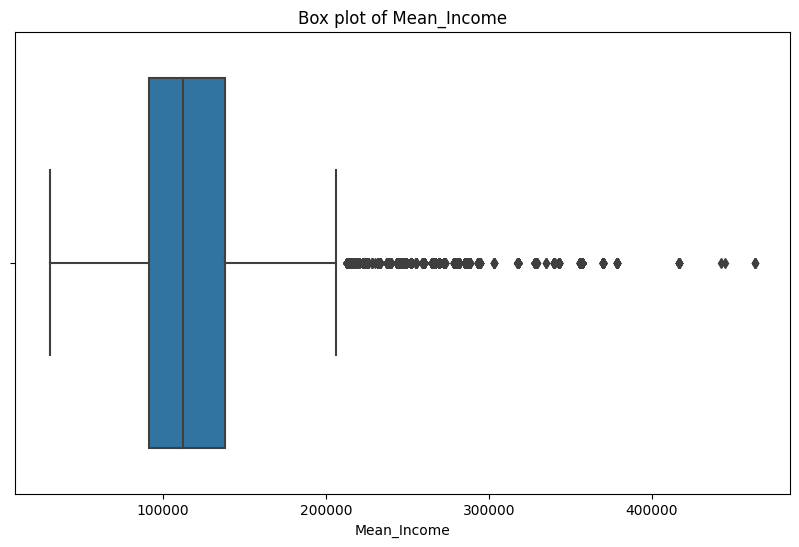

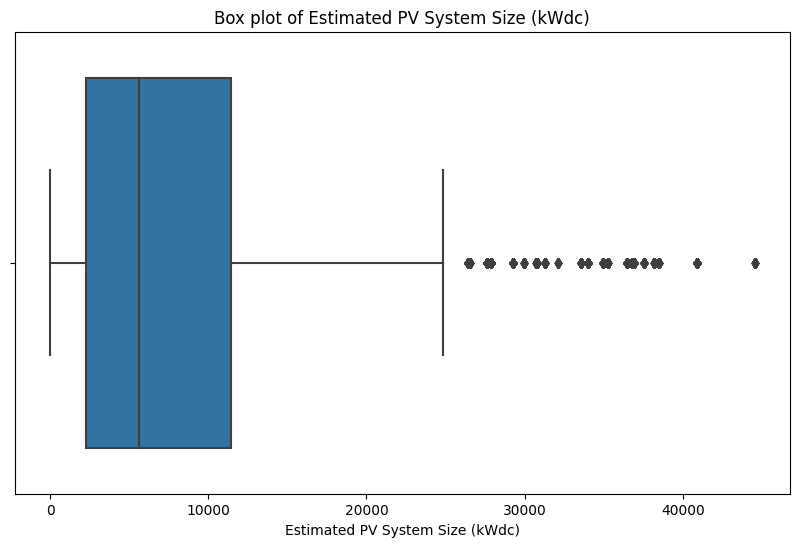

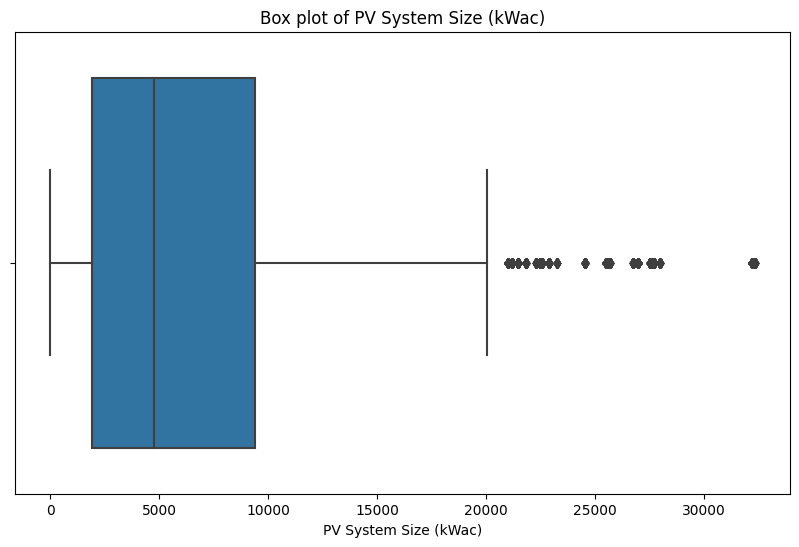

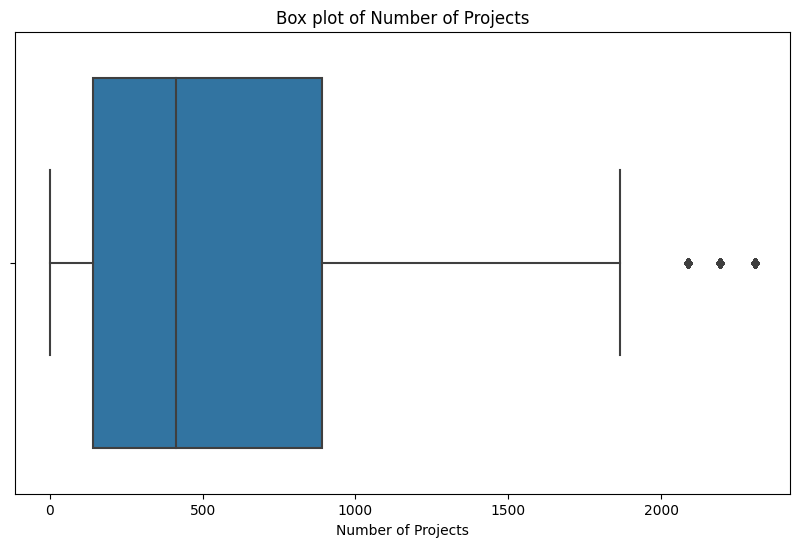

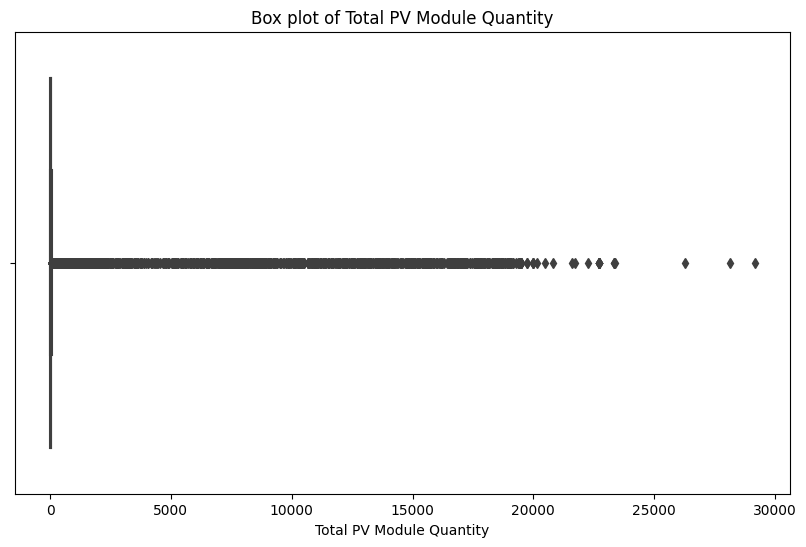

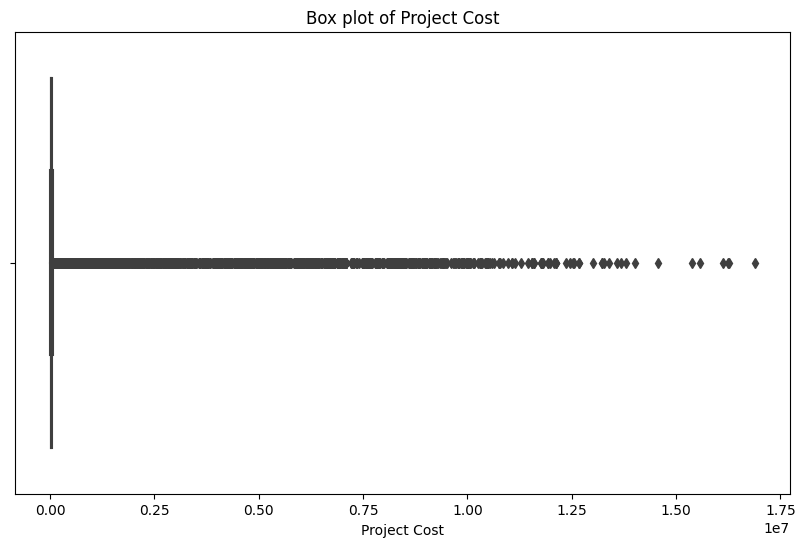

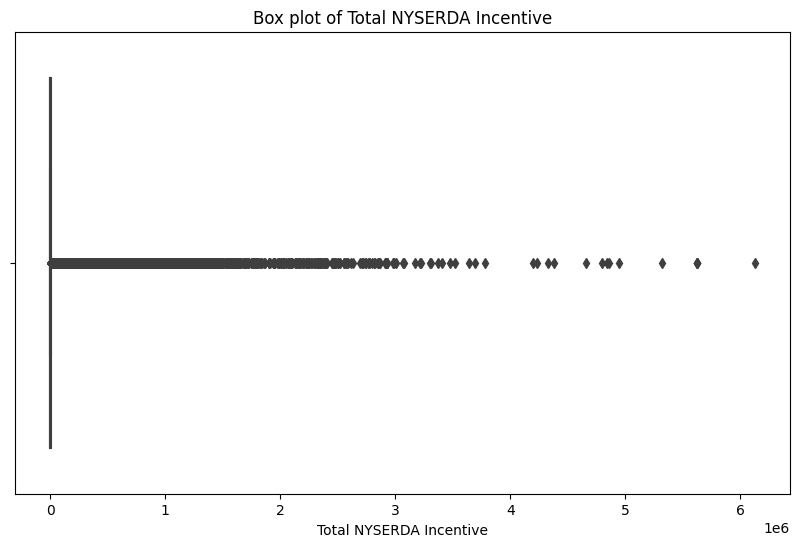

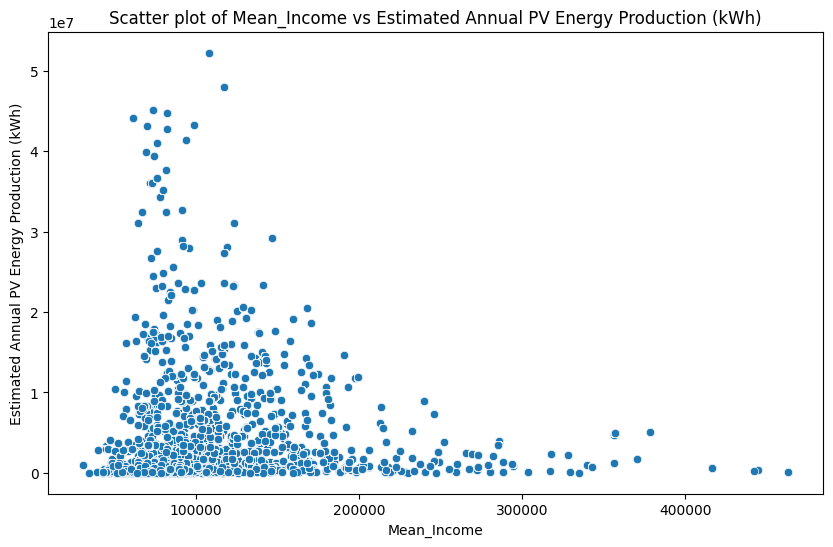

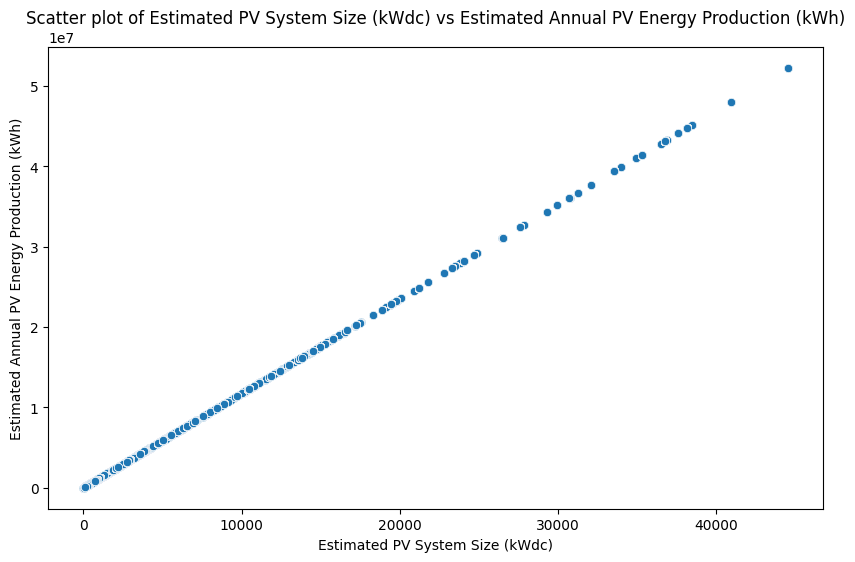

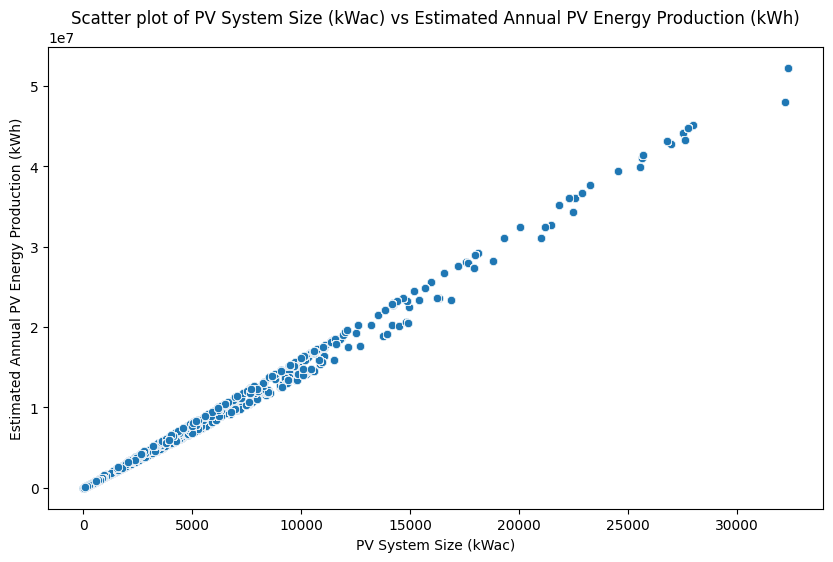

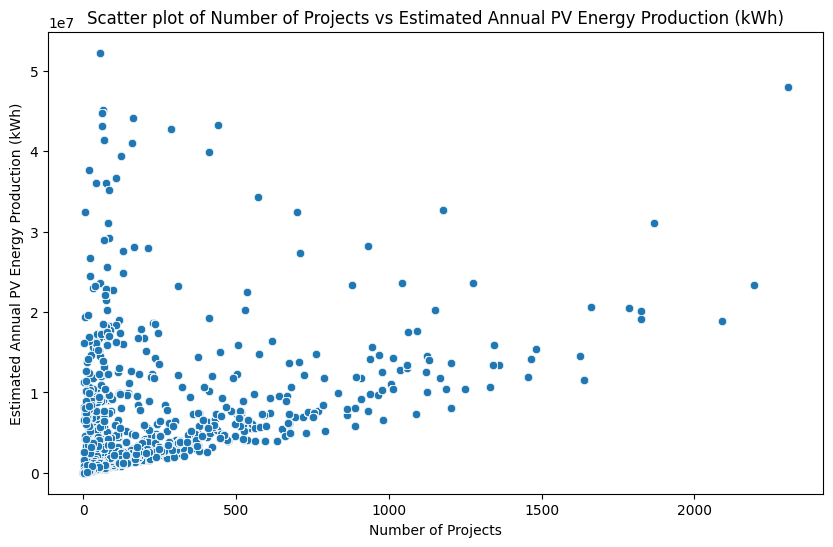

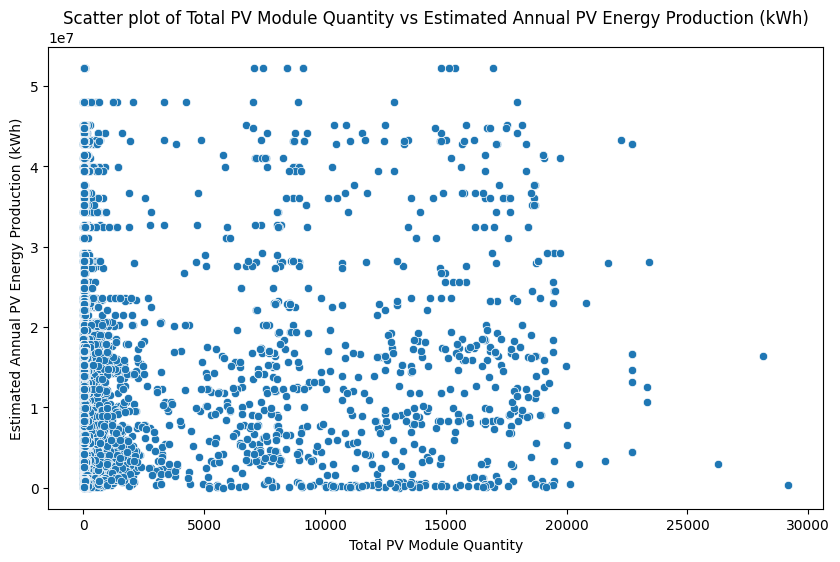

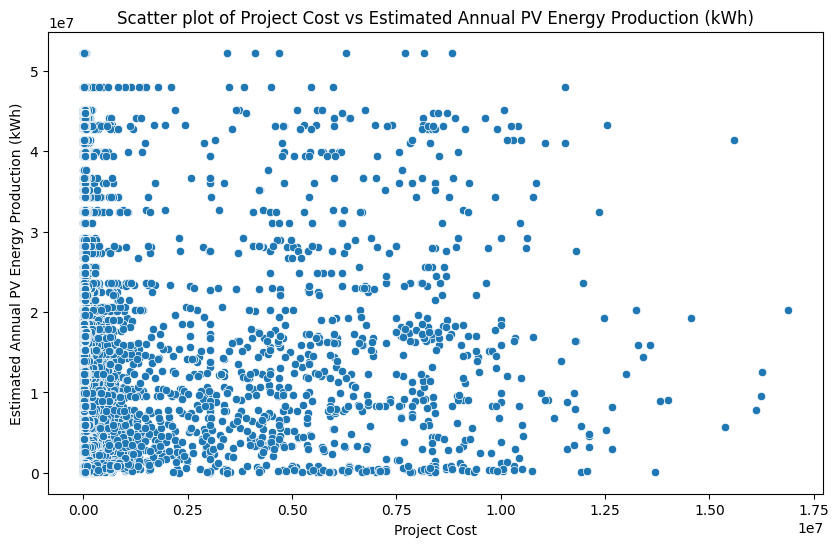

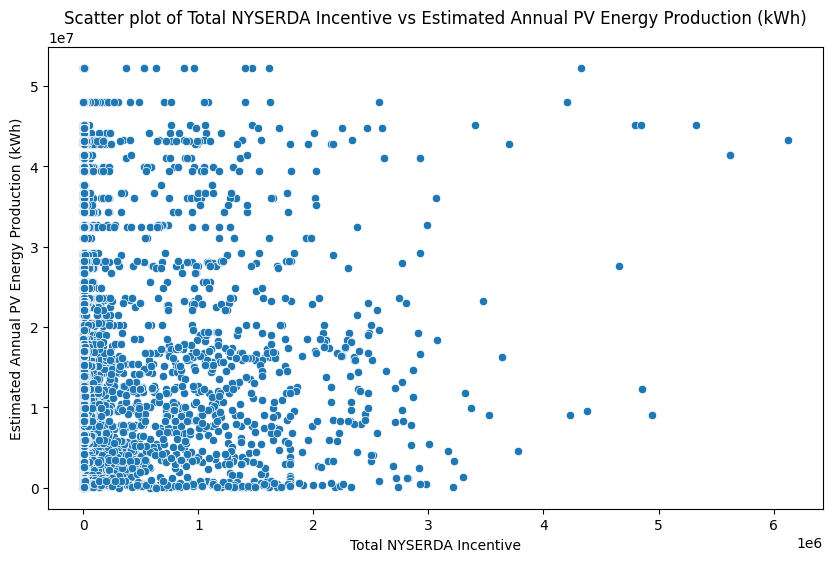

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Solar_Data_Final.csv')

# Define a function to detect outliers based on the IQR
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = df[c].quantile(0.25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = df[c].quantile(0.75)

        # Calculate the IQR (interquartile range) as the difference between the third and first quartile
        IQR = Q3 - Q1

        # Determine the outlier step (1.5 times the interquartile range)
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature c
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index

        # Append the found outlier indices for c to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # Select observations containing more than 2 outliers
    outlier_indices = pd.Series(outlier_indices).value_counts()
    outliers = outlier_indices[outlier_indices > 2].index.tolist()

    return outliers

# List of features to check for outliers
features_to_check = ['Mean_Income', 'Estimated PV System Size (kWdc)', 'PV System Size (kWac)',
                     'Number of Projects', 'Total PV Module Quantity', 'Project Cost',
                     'Total NYSERDA Incentive']

# Detect outliers in the dataset
outliers = detect_outliers(df, features_to_check)

print(f"Number of outliers detected: {len(outliers)}")

# Box plots for each feature to check for outliers
for feature in features_to_check:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

# Scatter plots of the target variable against other features to check for outliers
target_variable = 'Estimated Annual PV Energy Production (kWh)'
for feature in features_to_check:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df[target_variable])
    plt.title(f'Scatter plot of {feature} vs {target_variable}')
    plt.show()


In [ ]:
#CODE FOR REMOVING OUTLIERS
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

# Load your data
df = pd.read_csv('Solar_Data_Final.csv')

# Check if 'Expected KWh Annual Production' is in the DataFrame and drop it if present
if 'Expected KWh Annual Production' in df.columns:
    df.drop('Expected KWh Annual Production', axis=1, inplace=True)

# Detect and remove outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df[~outliers]

# Descriptive statistics and the first few rows of the cleaned DataFrame
print(df_cleaned.describe())
print(df_cleaned.head())

# Define the features and the target variable for the cleaned DataFrame
X = df_cleaned[['ZIP', 'Mean_Income', 'PV System Size (kWac)',
                'Number of Projects', 'Total PV Module Quantity', 'Project Cost',
                'Total NYSERDA Incentive']]
y = df_cleaned['Estimated Annual PV Energy Production (kWh)']

# Split the data into training and testing sets with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the models with pipelines to include scaling
models = {
    'LinearRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('linear', LinearRegression())
    ]),
    'DecisionTreeRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('decision_tree', DecisionTreeRegressor(max_depth=5))
    ]),
    'RandomForestRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('random_forest', RandomForestRegressor(max_depth=5))
    ]),
    'KNeighborsRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor())
    ])
}

# Dictionary to store the results
model_results = {}

# Train and evaluate models
for model_name, model in models.items():
    # Fit the model on the training set
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    # Store the results
    model_results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'CV Scores': cv_scores,
        'CV Average': cv_scores.mean()
    }

# Print the results
for model_name, results in model_results.items():
    print(f"Results for {model_name}:")
    print(f"MSE: {results['MSE']}")
    print(f"MAE: {results['MAE']}")
    print(f"R2: {results['R2']}")
    print(f"Cross-Validation Scores: {results['CV Scores']}")
    print(f"Average CV Score: {results['CV Average']}")
    print('---')


                ZIP    Mean_Income  Estimated PV System Size (kWdc)  \
count  85071.000000   85071.000000                     85071.000000   
mean   11499.788588  118249.558228                      6914.575617   
std      711.565132   30751.493965                      5177.962912   
min    10002.000000   39424.000000                         4.680000   
25%    10973.000000   95378.000000                      2604.660000   
50%    11432.000000  113768.000000                      5616.390000   
75%    12023.000000  139042.000000                     10168.300000   
max    14221.000000  206169.000000                     24866.650000   

       PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
count           85071.000000                                 8.507100e+04   
mean             5697.000114                                 8.116474e+06   
std              4147.311111                                 6.078089e+06   
min                 4.000000                        

In [ ]:
pip install tensorflow

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [ ]:
#v4
#Using complex models
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor


# Load your data
df = pd.read_csv('Solar_Data_Final.csv')

# Check if 'Expected KWh Annual Production' is in the DataFrame and drop it if present
if 'Expected KWh Annual Production' in df.columns:
    df.drop('Expected KWh Annual Production', axis=1, inplace=True)

# Detect and remove outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df[~outliers]

# Descriptive statistics and the first few rows of the cleaned DataFrame
print(df_cleaned.describe())
print(df_cleaned.head())

# Define the features and the target variable for the cleaned DataFrame
X = df_cleaned[['ZIP', 'Mean_Income',
                'Number of Projects', 'Total PV Module Quantity', 'Project Cost',
                'Total NYSERDA Incentive']]
y = df_cleaned['Estimated Annual PV Energy Production (kWh)']

# Split the data into training and testing sets with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the models with pipelines to include scaling
# Define the models with pipelines to include scaling
models = {
    'LinearRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('linear', LinearRegression())
    ]),
    'DecisionTreeRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('decision_tree', DecisionTreeRegressor(max_depth=5))
    ]),
    'RandomForestRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('random_forest', RandomForestRegressor(max_depth=5))
    ]),
    'GradientBoostingRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('gradient_boosting', GradientBoostingRegressor())
    ]),
    'XGBRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('xgb', XGBRegressor())
    ]),
    'KNeighborsRegressor': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor())
    ])
}

# Dictionary to store the results
model_results = {}

# Train and evaluate models
for model_name, model in models.items():
    # Fit the model on the training set
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    # Store the results
    model_results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'CV Scores': cv_scores,
        'CV Average': cv_scores.mean()
    }

# Print the results
for model_name, results in model_results.items():
    print(f"Results for {model_name}:")
    print(f"MSE: {results['MSE']}")
    print(f"MAE: {results['MAE']}")
    print(f"R2: {results['R2']}")
    print(f"Cross-Validation Scores: {results['CV Scores']}")
    print(f"Average CV Score: {results['CV Average']}")
    print('---')


                ZIP    Mean_Income  Estimated PV System Size (kWdc)  \
count  85071.000000   85071.000000                     85071.000000   
mean   11499.788588  118249.558228                      6914.575617   
std      711.565132   30751.493965                      5177.962912   
min    10002.000000   39424.000000                         4.680000   
25%    10973.000000   95378.000000                      2604.660000   
50%    11432.000000  113768.000000                      5616.390000   
75%    12023.000000  139042.000000                     10168.300000   
max    14221.000000  206169.000000                     24866.650000   

       PV System Size (kWac)  Estimated Annual PV Energy Production (kWh)  \
count           85071.000000                                 8.507100e+04   
mean             5697.000114                                 8.116474e+06   
std              4147.311111                                 6.078089e+06   
min                 4.000000                        

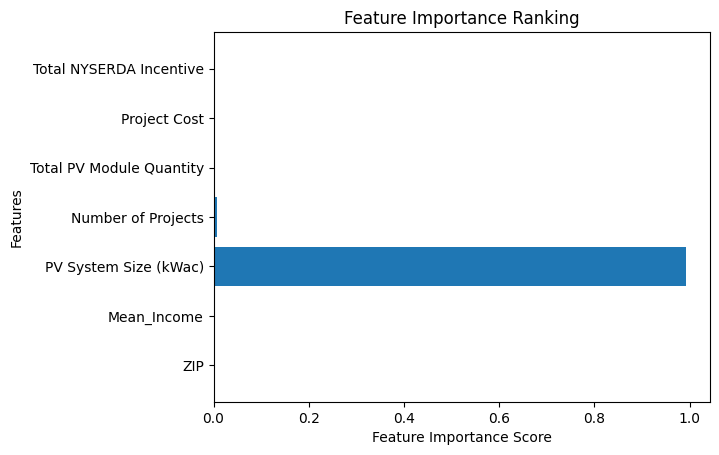

Potential data leakage detected in feature: PV System Size (kWac)
Correlation between PV System Size and Target: 0.9971297303835696


In [ ]:
#INSPECTING FOR DATA LEAKAGES
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined and are your training data

# Initialize the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Plot feature importances
plt.barh(X_train.columns, importances)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.show()

# Define your threshold based on your understanding (e.g., 0.1 for a relatively high threshold)
some_threshold = 0.1

# Check for any feature importances that stand out significantly
for feature, importance in zip(X_train.columns, importances):
    if importance > some_threshold:  # Define some_threshold based on your understanding
        print(f"Potential data leakage detected in feature: {feature}")

correlation = df_cleaned['PV System Size (kWac)'].corr(df_cleaned['Estimated Annual PV Energy Production (kWh)'])
print(f"Correlation between PV System Size and Target: {correlation}")


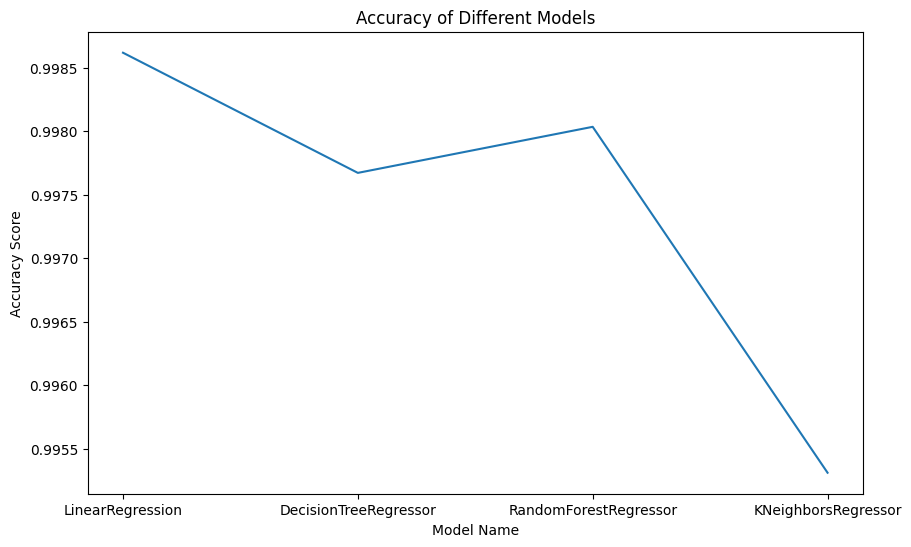

In [ ]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined and are your training data

# Initialize the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Plot feature importances
plt.barh(X_train.columns, importances)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.show()

# Check for any feature importances that stand out significantly
for feature, importance in zip(X_train.columns, importances):
    if importance > some_threshold:  # Define some_threshold based on your understanding
        print(f"Potential data leakage detected in feature: {feature}")
import matplotlib.pyplot as plt
# Evaluate the models on the testing set
model_names = []
scores = []
for model_name, model in models.items():
    score = model.score(X_test, y_test)
    model_names.append(model_name)
    scores.append(score)

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(model_names, scores)
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Different Models')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the hyperparameter grid
param_grid = {
    'max_depth': range(2, 11),
    'min_samples_split': range(2, 31),
    'min_samples_leaf': range(1, 31)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model_dt = grid_search.best_estimator_

# Print the best parameters
print("Best parameters for Decision Tree Regressor with Grid Search:")
print(best_model_dt.get_params())

Best parameters for Decision Tree Regressor with Grid Search:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
score = grid_search.score(X_test, y_test)
print('Model:', "Decision Tree Regressor with Grid Search", 'Score:', score)

0.9987118681752287

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': range(2, 101),
    'max_depth': range(2, 11),
    'min_samples_split': range(2, 31),
    'min_samples_leaf': range(1, 31),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model_rf = grid_search.best_estimator_

# Print the best parameters
print("Best parameters for Random Forest Regressor with Grid Search:")
print(best_model_rf.get_params())

In [ ]:
score = grid_search.score(X_test, y_test)
print('Model:', "Random Forest Regressor with Grid Search", 'Score:', score)

In [ ]:
## Four models suggested by Professor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
ridge = Ridge()
lasso = Lasso()
svr = SVR()
xgboost = XGBRegressor()

In [ ]:
# Train the models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
xgboost.fit(X_train, y_train)


NameError: ignored

In [ ]:
# Evaluate the models on the test set
ridge_score = ridge.score(X_test, y_test)
lasso_score = lasso.score(X_test, y_test)
xgboost_score = xgboost.score(X_test, y_test)

# Print the results
print('Ridge Regression score:', ridge_score)
print('Lasso Regression score:', lasso_score)
print('XGBoost Regressor score:', xgboost_score)

Ridge Regression score: 0.9999999997326154
Lasso Regression score: 0.9999999990349416
XGBoost Regressor score: 0.9999999009281971
